# Linear regression

Copyright 2018 Wes Barnett

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## 1 Linear regression with one variable

In [2]:
df = pd.read_csv('ex1data1.txt', header=None, names=['population', 'profit'])

In [3]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 1.1 Plotting the data

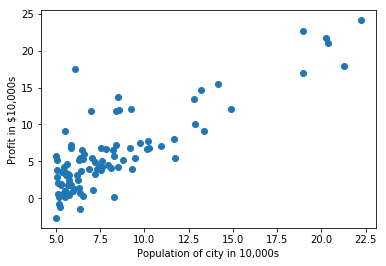

In [4]:
df.plot('population', 'profit', lw=0, marker='o', legend=False)
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.show()

### 1.2 Gradient descent

In [5]:
X = np.array([np.ones(df.shape[0]), df['population']]).T
y = df['profit']
m = len(y)
theta = np.zeros((2,))
iterations = 1500
alpha = 0.01

#### 1.2.1 Computing the cost function

$J(\theta) = \frac{1}{2m} \sum^{m}_{i=1} \left ( h_{\theta} (x^{(i)}) - y^{(i)} \right )^{2}$

$h_{\theta}(x) = \theta^{T}x = \theta_{0} + \theta_{1}x_{1} $

Vectorized form:

$J(\theta) =  \frac{1}{2}(X\Theta - y)^{T}(X\Theta - y)$

In [11]:
def computeCost(X, y, theta):
    tmp = np.matmul(X,theta) - y
    J = np.matmul(tmp.T, tmp) / (2.0 * y.shape[0])
    return J

In [9]:
# Expected = 32.072
J = computeCost(X, y, theta)
J

32.072733877455654

In [10]:
# Expected = 54.242
J = computeCost(X, y, [-1, 2])
J

54.24245508201238

#### 1.2.1 Batch gradient descent
$\theta_{j} := \theta_{j} - \alpha \frac{1}{m} \sum^{m}_{i=1} \left ( h_{\theta} (x^{(i)} ) - y^{(i)} \right )x_{j}^{(i)}$

Vectorized form:

$\theta_{j} := \theta_{j} - \alpha \frac{1}{m} (X\Theta - y) X$

In [9]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
            
        theta = theta - alpha/m * np.matmul(np.matmul(X,theta) - y, X)
    
        J_history[i] = computeCost(X, y, theta)
        
    return theta, J_history

In [10]:
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

In [11]:
# Expected = [-3.630, 1.166] when using alpha = 0.01, iterations = 1500
theta

array([-3.63029144,  1.16636235])

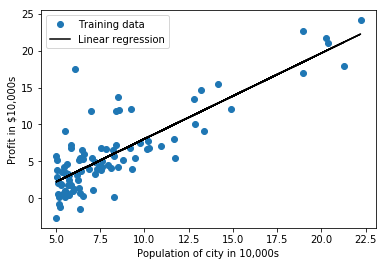

In [12]:
df.plot('population', 'profit', lw=0, marker='o', label='Training data')
plt.plot(df["population"], np.matmul(X, theta), label="Linear regression", color="black")
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.legend()
plt.show()

In [13]:
predict1 = np.matmul( np.array([1, 3.5]), theta)
print("For a population of 35,000 we predict a profit of ${0:.2f}.".format(predict1*10000))

For a population of 35,000 we predict a profit of $4519.77.


In [14]:
predict1 = np.matmul( np.array([1, 7]), theta)
print("For a population of 70,000 we predict a profit of ${0:.2f}.".format(predict1*10000))

For a population of 70,000 we predict a profit of $45342.45.


## 1.3 Cost function visualization

In [15]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

In [16]:
for i in range(theta0_vals.shape[0]):
    for j in range(theta1_vals.shape[0]):
        J_vals[i,j] = computeCost(X, y, [theta0_vals[i], theta1_vals[j]])

In [17]:
J_vals = np.transpose(J_vals)

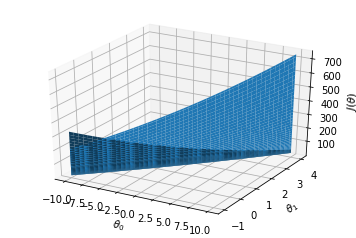

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals)
ax.set_xlabel("$\\theta_{0}$")
ax.set_ylabel("$\\theta_{1}$")
ax.set_zlabel("$J(\\theta)$")
plt.show()

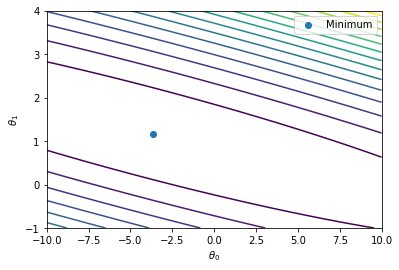

In [19]:
plt.contour(theta0_vals, theta1_vals, J_vals, 15)
plt.xlabel("$\\theta_{0}$")
plt.ylabel("$\\theta_{1}$")
plt.scatter(theta[0], theta[1], label="Minimum")
plt.legend()
plt.show()

## 2 Linear regression with multiple variables

In [20]:
df = pd.read_csv('ex1data2.txt', header=None, names=["size", "bedrooms", "price"])
df.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
X = df.drop("price", axis=1)
y = df["price"]
m = len(y)

In [22]:
X.head()

,size,bedrooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


### 2.1 Feature normalization

In [23]:
mu = X.apply(np.mean)
sigma = X.apply(np.std)
X = (X - mu) / sigma

In [24]:
X.head()

,size,bedrooms
0,0.131415,-0.226093
1,-0.509641,-0.226093
2,0.507909,-0.226093
3,-0.743677,-1.554392
4,1.271071,1.102205


In [25]:
X = np.hstack((np.ones((m,1)), X))

In [26]:
alpha = 0.01
num_iters = 400
theta = np.zeros(3)

### 2.2 Compute cost function and gradient descent

Previous implementation already does multiple variables.

In [27]:
J = computeCost(X, y, theta)
J

65591548106.45744

In [28]:
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

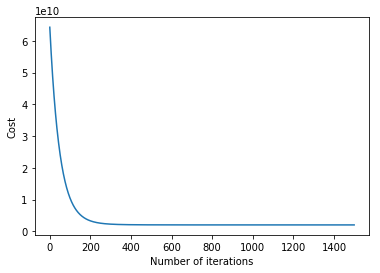

In [29]:
plt.plot(np.arange(0, len(J_history)), J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [30]:
print("theta = {0}".format(theta))

theta = [340412.56301439 109370.05670466  -6500.61509507]


#### 2.2.1 Learning rate selection

In [31]:
theta, J_history = gradientDescent(X, y, np.zeros(3), 10, 1000)

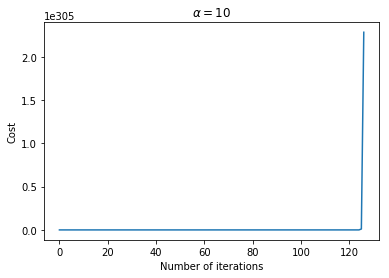

In [32]:
plt.plot(np.arange(0, len(J_history)), J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("$\\alpha = 10$")
plt.show()

In [33]:
theta, J_history = gradientDescent(X, y, np.zeros(3), 1e-6, 1000)

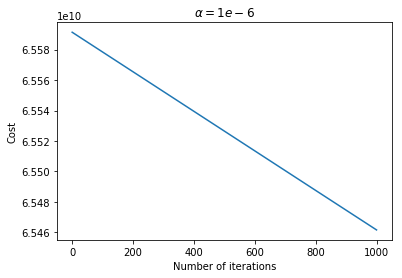

In [34]:
plt.plot(np.arange(0, len(J_history)), J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("$\\alpha = 1e-6$")
plt.show()

In [35]:
theta, J_history = gradientDescent(X, y, np.zeros(3), 1e-1, 1000)

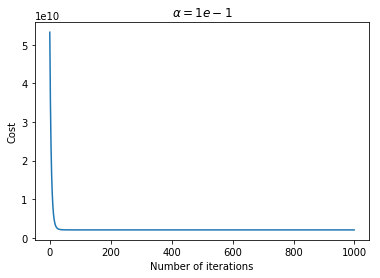

In [36]:
plt.plot(np.arange(0, len(J_history)), J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("$\\alpha = 1e-1$")
plt.show()

In [37]:
theta

array([340412.65957447, 109447.79646964,  -6578.35485416])

In [38]:
predict3 = np.matmul( np.array([1, (1650-mu['size'])/sigma['size'], (3. - mu['bedrooms'])/sigma['bedrooms']]), theta)
print("For a house size of 1650 sq-ft with 3 bedrooms, we predict price of ${0:.2f}.".format(predict3))

For a house size of 1650 sq-ft with 3 bedrooms, we predict price of $293081.46.


### 2.3 Normal equations
$\Theta = (X^{T}X)^{-1}X^{T}y$

Should be exactly the same as the answer above.

In [39]:
theta = np.matmul( np.matmul( np.linalg.inv(np.matmul( np.transpose(X), X)), np.transpose(X)), y)

In [40]:
predict3 = np.matmul( np.array([1, (1650-mu['size'])/sigma['size'], (3. - mu['bedrooms'])/sigma['bedrooms']]), theta)
print("For a house size of 1650 sq-ft with 3 bedrooms, we predict price of ${0:.2f}.".format(predict3))

For a house size of 1650 sq-ft with 3 bedrooms, we predict price of $293081.46.


In [41]:
theta

array([340412.65957447, 109447.79646964,  -6578.35485416])

## 3 Scikit-learn

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy import linalg

### 3.1 Linear regression with a single variable

In [43]:
lr = LinearRegression()

In [44]:
df = pd.read_csv('ex1data1.txt', header=None, names=['population', 'profit'])

In [45]:
lr.fit(df['population'].values.reshape(-1,1), df['profit'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# Previous = [-3.630, 1.166]
print(lr.intercept_, lr.coef_)

[-3.89578088] [[1.19303364]]


In [47]:
# Use previous implementation but with more iterations gives us the same answer
theta, J_history = gradientDescent(X, y, theta, 0.01, 15000)

In [48]:
theta

array([340412.65957447, 109447.79646964,  -6578.35485416])

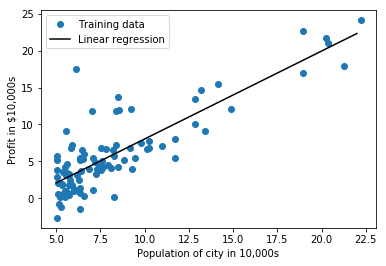

In [49]:
df.plot('population', 'profit', lw=0, marker='o', label='Training data')
x = np.arange(5,22.5)
y = lr.coef_[0]*x + lr.intercept_[0]
plt.plot(x, y, label="Linear regression", color='black')
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.legend()
plt.show()

### 3.2 Linear regression with multiple variables

In [50]:
df = pd.read_csv('ex1data2.txt', header=None, names=['size', 'bedrooms', 'price'])
X = df.drop("price", axis=1)
y = df["price"]
pipe = Pipeline(steps=[('ss', StandardScaler()),
                       ('lr', LinearRegression())])
pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [51]:
# Should be $293081.46, just as above.
X_pred = np.array([1650., 3.]).reshape(1,2)
y_pred = pipe.predict(X_pred)
print("For a house size of 1650 sq-ft with 3 bedrooms, we predict price of ${0:.2f}.".format(y_pred[0]))

For a house size of 1650 sq-ft with 3 bedrooms, we predict price of $293081.46.
